In [1]:
from requests import post
from app.analysis import Quote
query = 'query UnknownFile($limit_0:[FundLimitOptionInput!]!) {viewer {...Fe}} fragment Fe on Viewer {_screenFunds4s9d1a:screenFunds(filterCategory:["$$"],limit:$limit_0,first:100) {edges {node {symbol}}}}'
variables = {'limit_0':[{'type':'FUND_TOTAL_ASSETS','min':1000000000,'inclusive':True},{'type':'FUND_NET_EXPENSE_RATIO','max':1,'inclusive':True}]}
r = post('https://lens.m1finance.com/graphql', json={'query': query.replace('$$', 'Industries'), 'variables': variables}).json()
symbols = [n['node']['symbol'] for n in r['data']['viewer']['_screenFunds4s9d1a']['edges']]

In [2]:
quote = Quote(symbols, 50, 10)
f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}'

'from 2019-05-15 to 2019-07-03 - 62'

In [3]:
stat = quote.statistics()
stat = stat[(stat['drawdown'] < 6) & (stat['shrp'] > 0.6)]
print(len(stat))
stat

22


,len,mean,std,shrp,drawdown
Symbols,,,,,
IHI,25,3.621757,2.245144,1.577801,2.045544
XAR,25,2.356500,1.447949,1.572663,2.376372
IGF,25,1.897780,1.231959,1.476035,1.751762
IXJ,25,2.136452,1.666222,1.234581,2.668439
FXH,25,2.617527,2.148219,1.181519,2.855186
XLV,25,2.135204,1.794305,1.145758,2.741251
VHT,25,2.177515,1.901500,1.103418,2.877869
IYH,25,2.145491,1.874344,1.102320,2.779547
FHLC,25,2.188394,1.918724,1.099183,2.790587


Populating the interactive namespace from numpy and matplotlib
evicted VHT 0.999446634857061
evicted VPU 0.9957034247893107
evicted IYH 0.9978721529063332
evicted FXH 0.9718293013105601
evicted FHLC 0.9941982032858254
evicted GNR 0.9897686093643921
evicted XLB 0.9859487678296813
evicted XLI 0.9968737383539605
evicted VIS 0.9634502259404177
evicted XT 0.9337038873050658
evicted VAW 0.8325074844500063
evicted XLV 0.9921841515566759
evicted GUNR 0.8599295271364181
evicted IXJ 0.9222398780981814
evicted FBT 0.9732401379283976
evicted ITA 0.7894295290149985
evicted XBI 0.9716910130905398
evicted IBB 0.6198578631067047
evicted IGF 0.8847789381321488
evicted XLU 0.5960807138133138
{'IHI': 0.39, 'XAR': 0.61}


,count,mean,std,min,25%,50%,75%,max,shrp,drawdown
Portfolio,25.0,2.846715,1.536102,-1.404629,2.297339,2.822278,3.997227,4.755960,1.801540,1.751297
IHI,25.0,3.621757,2.245144,-0.813703,1.930923,3.536081,5.519525,7.055224,1.577801,2.045544
XAR,25.0,2.356500,1.447949,-1.780440,1.841594,2.273668,3.265340,4.508870,1.572663,2.376372


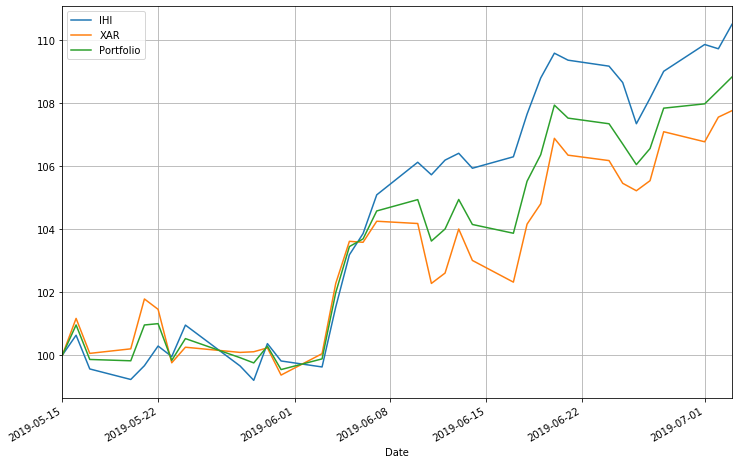

In [4]:
%pylab inline
quote.drop_mask()
ratio = quote.optimize_portfolio(stat.index)
print(ratio)
quote.setup_mask(ratio)
quote.graph(ratio)